# HODMD library for simple function

1. Tensor Train-Based Higher-Order Dynamic Mode Decomposition for Dynamical Systems 
$$ f(x,t) = e^{-x^2/5} \cos(2x) \sqrt{1 + \frac{1}{2} \sin t}, $$

$$ x \in [-3, 3], \quad t \in [0, 4\pi]. $$

2. Algorithm DMD: 
![alt text](DMD.png)

3. Algorithm HODMD:


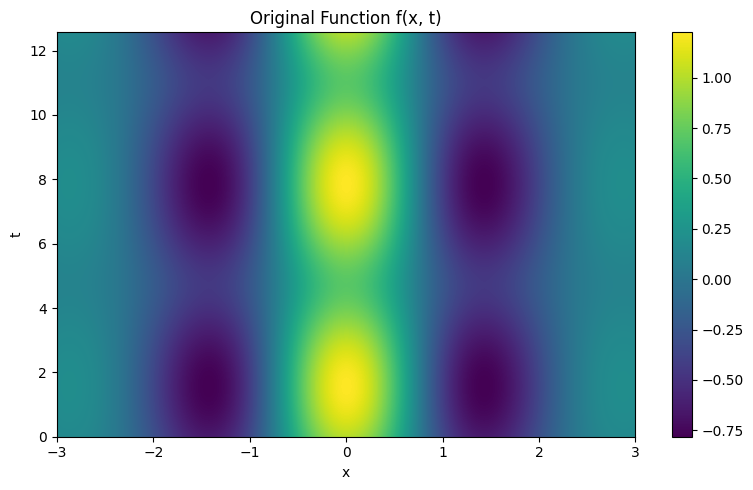

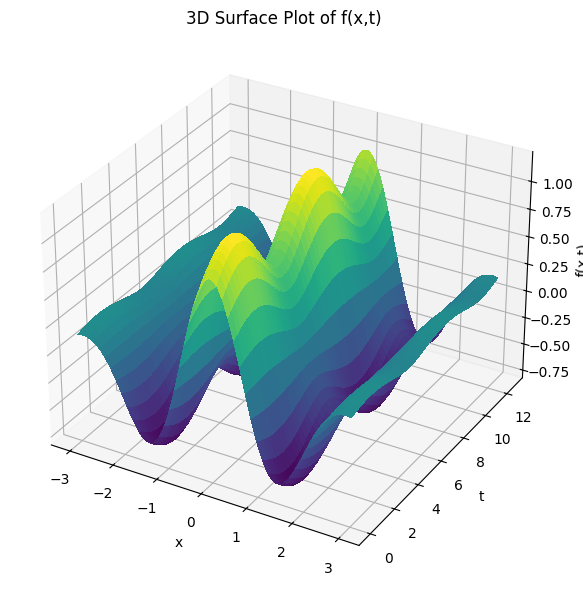

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import HODMD

x = np.linspace(-3, 3, 449)
t = np.linspace(0, 4 * np.pi, 1000)
X, T = np.meshgrid(x, t, indexing='ij')

f = np.exp(-X**2 / 5) * np.cos(2 * X) * np.sqrt(1 + 0.5 * np.sin(T))

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(f.T, aspect='auto',
               extent=[x[0], x[-1], t[0], t[-1]],
               origin='lower', cmap='viridis')
ax.set_title("Original Function f(x, t)")
ax.set_xlabel("x")
ax.set_ylabel("t")
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

X3d, T3d = np.meshgrid(x, t, indexing='ij')  # (449, 1000)
ax.plot_surface(X3d, T3d, f, cmap='viridis', linewidth=0, antialiased=False)

ax.set_title("3D Surface Plot of f(x,t)")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("f(x,t)")

plt.tight_layout()
plt.show()

c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 1.333332910588796e+36. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 2.590281099461123e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


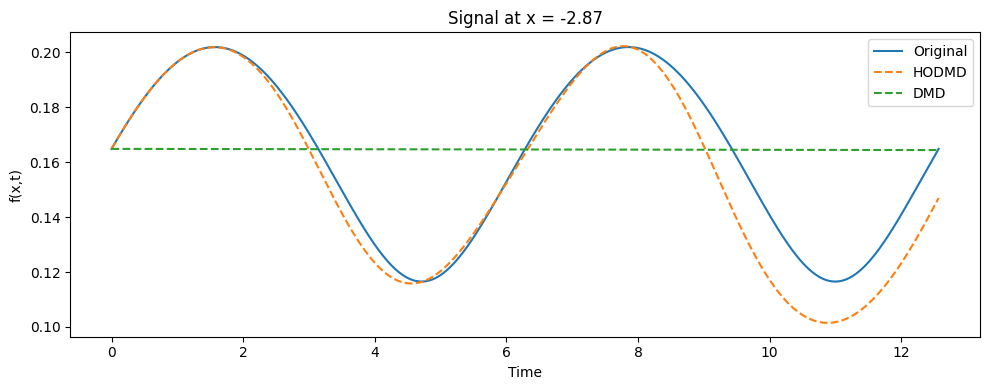

In [19]:
from pydmd import HODMD
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 449)
t = np.linspace(0, 4 * np.pi, 1000)
X_grid, T_grid = np.meshgrid(x, t, indexing='ij')
f = np.exp(-X_grid**2 / 5) * np.cos(2 * X_grid) * np.sqrt(1 + 0.5 * np.sin(T_grid))

hodmd = HODMD(svd_rank=10, d=50, exact=True)
hodmd.fit(f)

hodmd_1 = HODMD(svd_rank=10, d=1, exact=True)
hodmd_1.fit(f)

X_dmd = hodmd.reconstructed_data.real  # Reconstructed signal
X_dmd_1 = hodmd_1.reconstructed_data.real  # Reconstructed signal

# Time signal at x[10] ---
plt.figure(figsize=(10, 4))
plt.plot(t, f[10, :], label='Original')
plt.plot(t[:X_dmd.shape[1]], X_dmd[10, :], '--', label='HODMD')
plt.plot(t[:X_dmd_1.shape[1]], X_dmd_1[10, :], '--', label='DMD')
plt.title("Signal at x = {:.2f}".format(x[10]))
plt.xlabel("Time")
plt.ylabel("f(x,t)")
plt.legend()
plt.tight_layout()

#  HODMD library for vortall.mat dataset

c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 7255171.591728224. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 86074796.17607152. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


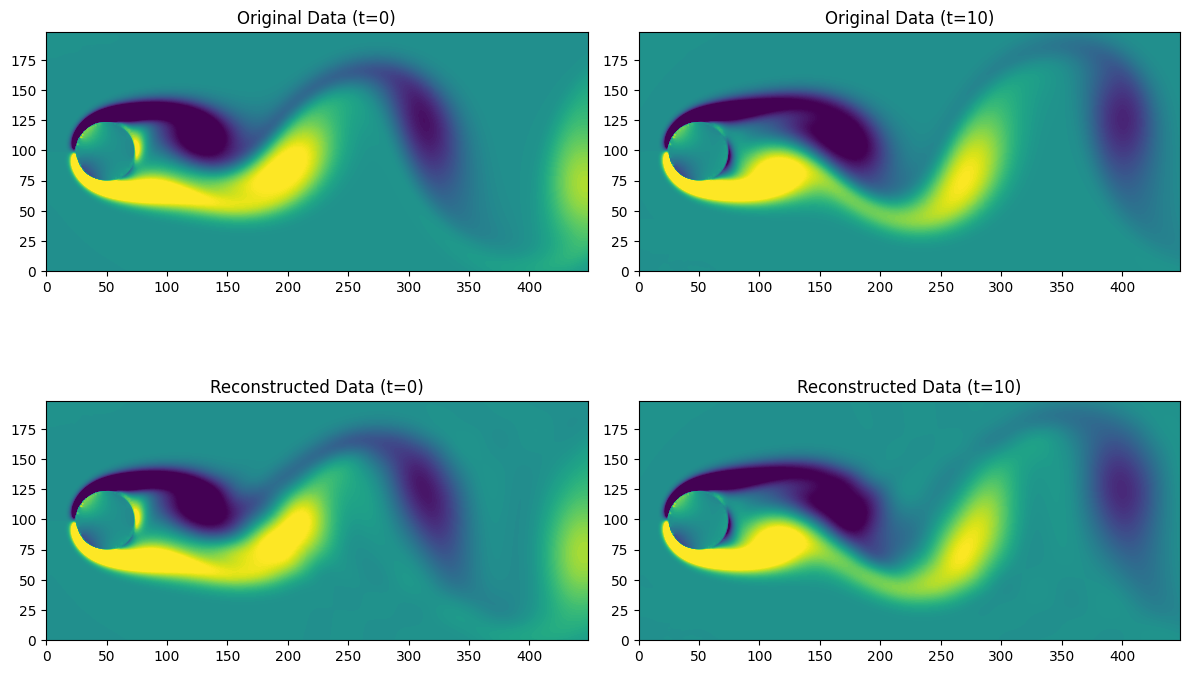

In [20]:
from pydmd import HODMD
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

vortall_mat = io.loadmat('VORTALL.mat')
X = vortall_mat['VORTALL'][:, :100]  # Limit to 100 time steps

T = X.shape[1]
m, n = 199, 449  

# example for rank 10 and dilation 50
hodmd = HODMD(svd_rank=10, d=50, exact=True)  
hodmd.fit(X)

# Reconstructed data
X_dmd = hodmd.reconstructed_data.real

# Plot 
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original data at t=0
ax[0, 0].contourf(np.reshape(X[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[0, 0].set_title("Original Data (t=0)")
ax[0, 0].set_aspect('equal')

# Original data at t=10
ax[0, 1].contourf(np.reshape(X[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[0, 1].set_title("Original Data (t=10)")
ax[0, 1].set_aspect('equal')

# Reconstructed data at t=0
ax[1, 0].contourf(np.reshape(X_dmd[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[1, 0].set_title("Reconstructed Data (t=0)")
ax[1, 0].set_aspect('equal')

# Reconstructed data at t=10
ax[1, 1].contourf(np.reshape(X_dmd[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[1, 1].set_title("Reconstructed Data (t=10)")
ax[1, 1].set_aspect('equal')

plt.tight_layout()
plt.show()

# NORMAL - DMD D=1

1. $
\mathbf{X}=\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^{\mathbf{T}} \approx \widetilde{\mathbf{U}} \widetilde{\mathbf{\Sigma}} \widetilde{\mathbf{V}}^{\mathbf{T}}
$

2. $
\begin{aligned}
& A=X^{\prime} X^{+}=X^{\prime}\left(\widetilde{U} \widetilde{\Sigma} \widetilde{V}^T\right)^{+}=X^{\prime} \widetilde{V} \widetilde{\Sigma}^{-1} \widetilde{U}^T \\
& \widetilde{A}=\widetilde{U}^T \mathbf{A} \widetilde{U}=\widetilde{U}^T \mathbf{X}^{\prime} \widetilde{V} \widetilde{\Sigma}^{-1}
\end{aligned}
$ 

3. $
\widetilde{A} W=W \Lambda
$

4. $
\Phi=X^{\prime} \widetilde{V} \widetilde{\Sigma}^{-1} W
$

5. $\mathbf{b}=\boldsymbol{\Phi}^{+} \boldsymbol{x}(\boldsymbol{t}=\mathbf{0})$

6. $\mathbf{x}_k=\sum_{j=1}^r \boldsymbol{\phi}_j \lambda_j^{k-1} b_j=\boldsymbol{\Phi} \mathbf{\Lambda}^{k-1} \mathbf{b}$


CPU times: total: 12.9 s
Wall time: 8.74 s


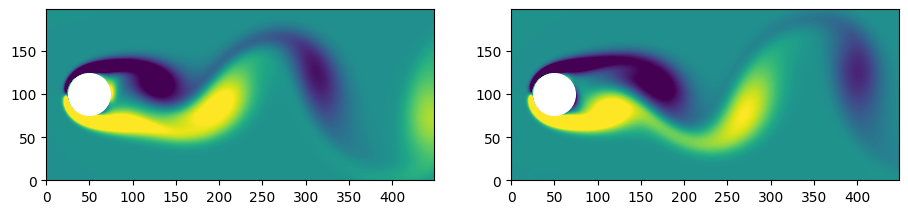

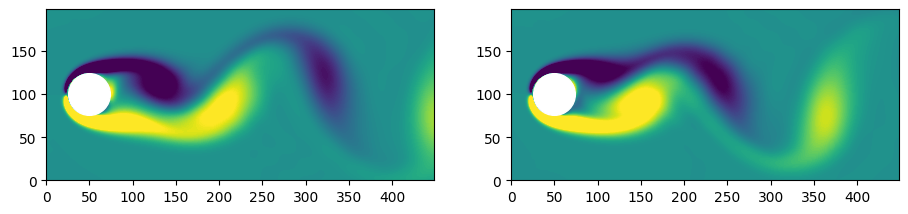

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def main():

    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']
    # print(X.shape())
    X = X[:, :100]
    T = X.shape[1]

    m = 199
    n = 499

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    ax[0].contourf(np.real(np.reshape(X[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X[:, 10], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)
    ax[1].set_aspect('equal')

    # DMD algorthm
    def DMD(X1, X2, r, dt):
        # 1. Singular value decomposition
        U, s, Vh = np.linalg.svd(X1, full_matrices=False)
        Ur = U[:, :r] # spatial modes
        Sr = np.diag(s[:r]) # weights
        Vr = Vh.conj().T[:, :r] # temporal modes

        # 2. Computing pseudo-inverse with projection in space modes because A is big
        Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr) #shape r by r 

        # 3. Eigenvectors decomposition to project then back to 
        Lambda, W = np.linalg.eig(Atilde)

        # 4. Get back into the high dimentional space , eignevalues dont change
        Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W

        # 5. frecuencies
        omega = np.log(Lambda) / dt

        # 5. Amplitud vector 
        alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]
        
        # 6. DMD expansion
        time_dynamics = None
        for i in range(X1.shape[1]):
            v = np.array(alpha1)[:, 0] * np.exp(np.array(omega) * (i + 1) * dt)
            if time_dynamics is None:
                time_dynamics = v
            else:
                time_dynamics = np.vstack((time_dynamics, v))

        X_dmd = np.dot(np.array(Phi), time_dynamics.T)

        return Phi, omega, Lambda, alpha1,  X_dmd, time_dynamics.T

    # Data
    X1 = np.matrix(X[:, 0:-1])
    X2 = np.matrix(X[:, 1:])
    DMD_rank = 11
    dt = T * 0.001

    # Call DMD
    Phi, omega, Lambda, alpha1,  X_dmd, time_dynamics = DMD(X1, X2, DMD_rank, dt)

    # Plot DMD reconstructed\
    
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    ax[0].contourf(np.real(np.reshape(X_dmd[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X_dmd[:, 20], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[1].set_aspect('equal')

%time main()

# doesnt work 

<class 'numpy.ndarray'>
shape of data is (89351, 151)
x1shape 99
CPU times: total: 14.7 s
Wall time: 6.68 s


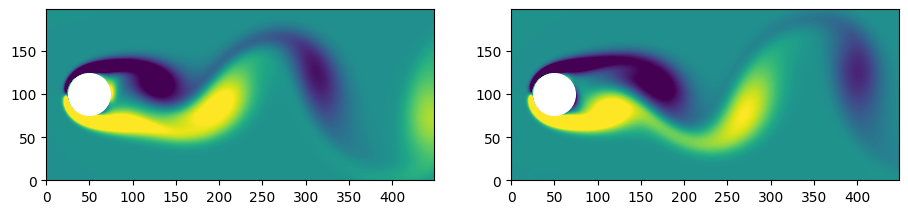

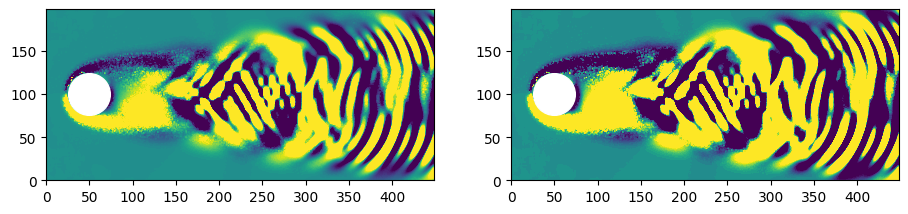

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def main():

    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']
    print(type(X))
    print(f'shape of data is {np.shape(X)}')
    X = X[:, :100]
    T = X.shape[1]

    m = 199
    n = 499

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    ax[0].contourf(np.real(np.reshape(X[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X[:, 10], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)
    ax[1].set_aspect('equal')

    # DMD algorthm
    def DMD(X1, X2, r, dt):
        # 1. Singular value decomposition
        U, s, Vh = np.linalg.svd(X1, full_matrices=False)
        Ur = U[:, :r] # spatial modes
        Sr = np.diag(s[:r]) # weights
        Vr = Vh.conj().T[:, :r] # temporal modes

        # 2. Computing pseudo-inverse with projection in space modes because A is big
        Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr) #shape r by r 

        # 3. Eigenvectors decomposition to project then back to 
        Lambda, W = np.linalg.eig(Atilde)

        # 4. Get back into the high dimentional space , eignevalues dont change
        Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W

        # frecuencies
        omega = np.log(Lambda) / dt

        # 5. b or alpha vector for t=0
        alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]
        
        b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

        time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
        print("x1shape",X1.shape[1])
        
        for i in range(X1.shape[1]):
            time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

        X_dmd = Phi @ time_dynamics
        return X_dmd, r
    
    
    # Data
    X1 = np.matrix(X[:, 0:-1])
    X2 = np.matrix(X[:, 1:])
    DMD_rank = 42
    dt = T * 0.001

    # Call DMD
    # Phi, omega, Lambda, alpha1, b, X_dmd, time_dynamics = DMD(X1, X2, DMD_rank, dt)
    X_dmd, r = DMD(X1, X2, DMD_rank, dt)

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    # Plot DMD reconstructed
    ax[0].contourf(np.real(np.reshape(X_dmd[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X_dmd[:, 10], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[1].set_aspect('equal')

%time main()

# HODMD d=50 Vortal data

x1shape 50
Selected rank r = 21 based on energy threshold 1e-06
x_dmd (4467550, 50)
(89351, 51)


c:\Python312\Lib\site-packages\matplotlib\contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
c:\Python312\Lib\site-packages\matplotlib\contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
c:\Python312\Lib\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


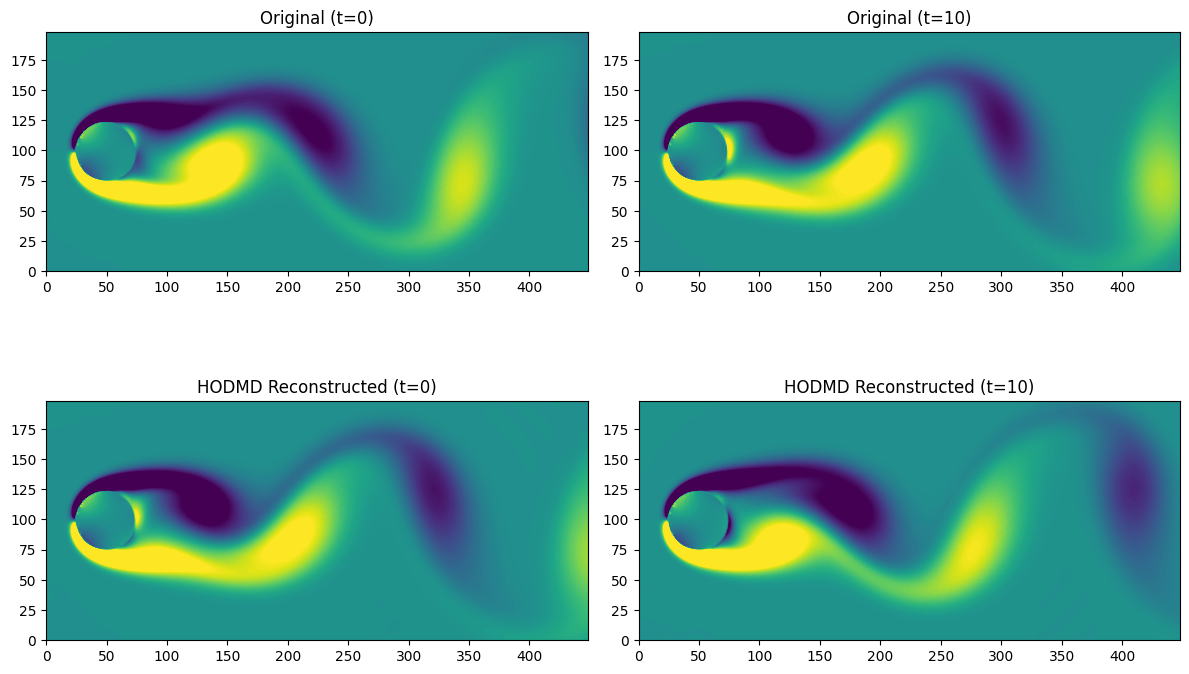

CPU times: total: 2min 48s
Wall time: 40.8 s


In [34]:
# %%timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    print("x1shape",X1.shape[1])
    
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449 
    delay = 50
    dt = 1.0  
    energy_threshold = 1e-6

    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    print(f"Selected rank r = {r} based on energy threshold {energy_threshold}")
    print("x_dmd",X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    print(X_trimmed.shape)

    X_dmd_trimmed = X_dmd[:449*199,:]
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].contourf(np.reshape(X_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(np.reshape(X_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(np.reshape(X_dmd_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(np.reshape(X_dmd_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

%time main()

# test

x1shape 50
Selected rank r = 21 based on energy threshold 1e-06
x_dmd (4467550, 50)
(89351, 51)


c:\Python312\Lib\site-packages\matplotlib\contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
c:\Python312\Lib\site-packages\matplotlib\contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
c:\Python312\Lib\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


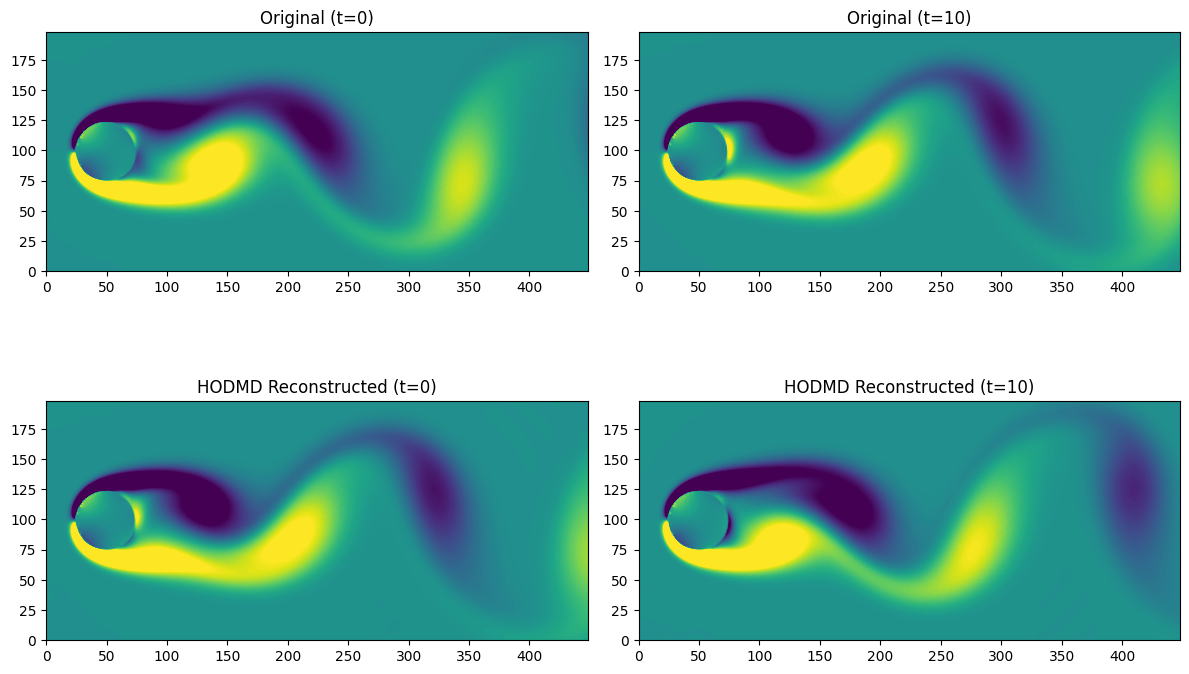

CPU times: total: 2min 43s
Wall time: 40.5 s


In [53]:
# %%timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    print("x1shape",X1.shape[1])
    
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449 
    delay = 50
    dt = 1.0  
    energy_threshold = 1e-6

    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    print(f"Selected rank r = {r} based on energy threshold {energy_threshold}")
    print("x_dmd",X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    print(X_trimmed.shape)

    X_dmd_trimmed = X_dmd[:449*199,:]
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].contourf(np.reshape(X_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(np.reshape(X_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(np.reshape(X_dmd_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(np.reshape(X_dmd_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

%time main()

x1shape 99
Selected rank r = 21 based on energy threshold 1e-06
x_dmd (89351, 99)
(89351, 100)


c:\Python312\Lib\site-packages\matplotlib\contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
c:\Python312\Lib\site-packages\matplotlib\contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
c:\Python312\Lib\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


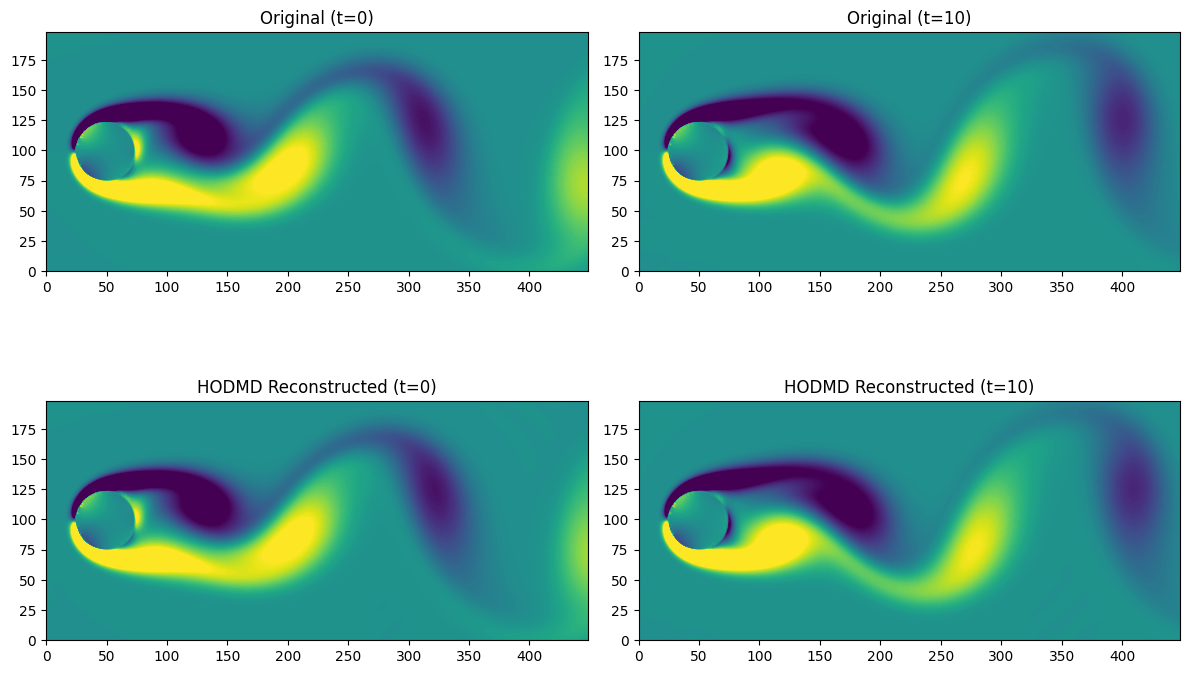

CPU times: total: 13.1 s
Wall time: 6.67 s


In [33]:
# %%timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    print("x1shape",X1.shape[1])
    
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = alpha1 * np.exp(omega * ((i + 1) * dt)) 

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449 
    delay = 1
    dt = 1.0  
    energy_threshold = 1e-6

    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    print(f"Selected rank r = {r} based on energy threshold {energy_threshold}")
    print("x_dmd",X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    print(X_trimmed.shape)

    X_dmd_trimmed = X_dmd[:449*199,:]
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].contourf(np.reshape(X_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(np.reshape(X_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(np.reshape(X_dmd_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(np.reshape(X_dmd_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

%time main()

# HSTACK 

(89351, 2550)
x1shape 2549
Selected rank r = 21 based on energy threshold 1e-06
x_dmd (89351, 2549)
(89351, 51)


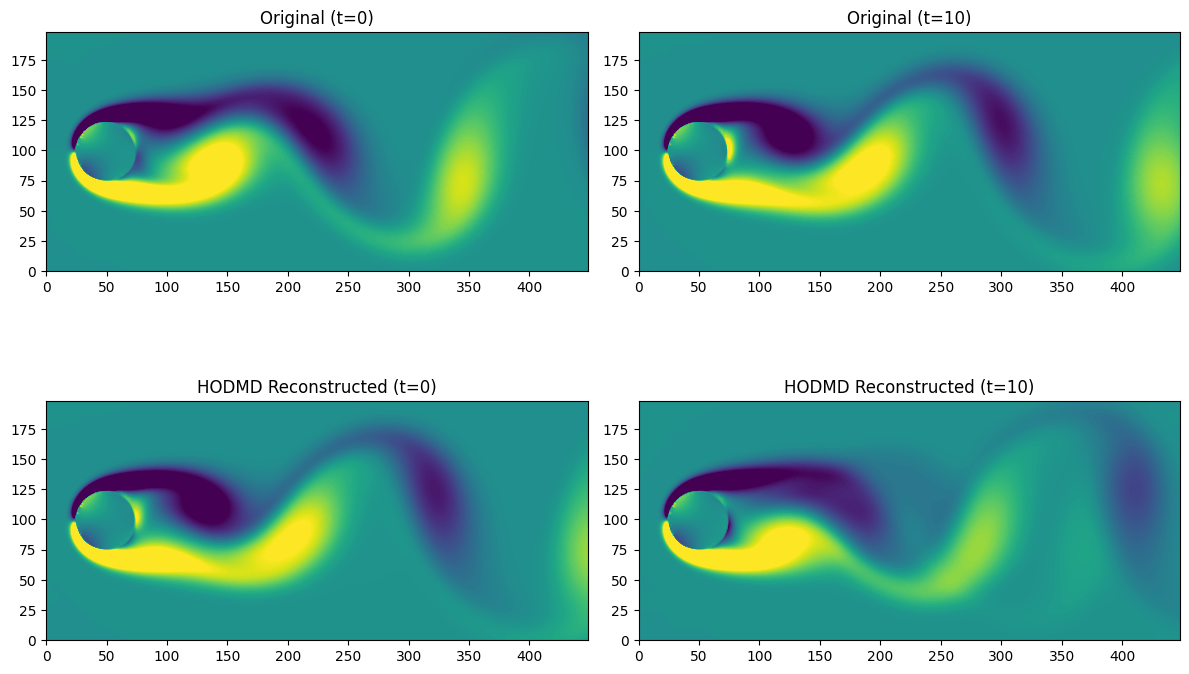

CPU times: total: 14min 12s
Wall time: 1min 56s


In [23]:
# %%timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.hstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    print(np.shape(X_aug))
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    print("x1shape",X1.shape[1])
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = alpha1 * np.exp(omega * ((i + 1) * dt))

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449 
    delay = 50
    dt = 1.0  
    energy_threshold = 1e-6

    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    print(f"Selected rank r = {r} based on energy threshold {energy_threshold}")
    print("x_dmd",X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    print(X_trimmed.shape)

    X_dmd_trimmed = X_dmd[:449*199,:]
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].contourf(np.reshape(X_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(np.reshape(X_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(np.reshape(X_dmd_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(np.reshape(X_dmd_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

#just time main function not plots, fix it my genious friend 
%time main()

# TENSOR PYTORCH (STILL NEEDS IMPROVEMENT)

torch.Size([4467550, 51])
Execution time: 25.8744 seconds
Selected rank r = 21
X_dmd shape: torch.Size([4467550, 50])


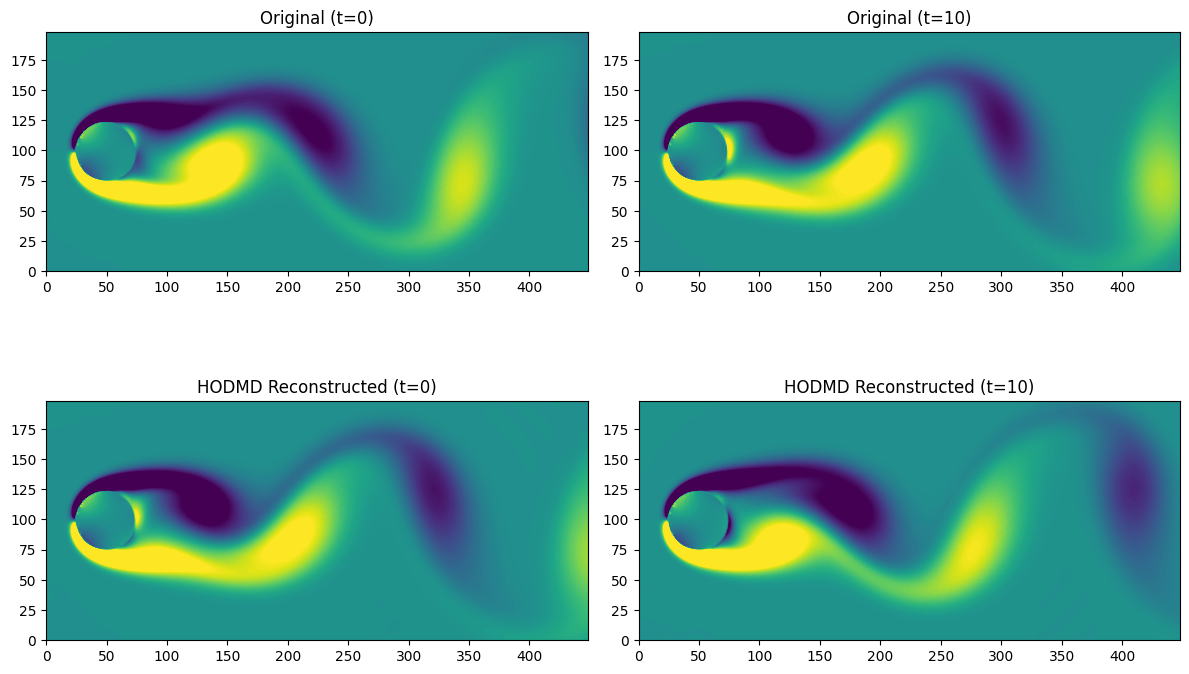

In [24]:
import torch
import matplotlib.pyplot as plt
from scipy import io
import time

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return torch.cat(X_delayed, dim=0)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = torch.sum(S_squared)
    cumulative = torch.cumsum(S_squared.flip(0), dim=0).flip(0)
    EE = cumulative / total_energy
    N = torch.nonzero(EE <= threshold)
    return int(N[0]) if len(N) > 0 else len(S)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    print(X_aug.shape)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    # Use double precision
    U, S, Vh = torch.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].to(dtype=torch.complex128)
    Sr = torch.diag(S[:r]).to(dtype=torch.complex128)
    Vr = Vh.conj().T[:, :r].to(dtype=torch.complex128)
    X2_c = X2.to(dtype=torch.complex128)

    Atilde = Ur.conj().T @ X2_c @ Vr @ torch.linalg.inv(Sr)
    Lambda, W = torch.linalg.eig(Atilde)
    Phi = X2_c @ Vr @ torch.linalg.inv(Sr) @ W
    omega = torch.log(Lambda) / dt

    alpha1 = torch.linalg.lstsq(Phi, X1[:, 0].to(dtype=torch.complex128)).solution

    time_dynamics = torch.zeros((r, X1.shape[1]), dtype=torch.complex128)
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = alpha1 * torch.exp(omega * ((i + 1) * dt))

    X_dmd = Phi @ time_dynamics
    return X_dmd.real.to(dtype=torch.float64), r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X_np = vortall_mat['VORTALL'][:, :100]
    X = torch.tensor(X_np, dtype=torch.float64)

    m, n = 199, 449
    delay = 50
    dt = 1.0
    energy_threshold = 1e-6

    start = time.time()
    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    end = time.time()

    print(f"Execution time: {end - start:.4f} seconds")
    print(f"Selected rank r = {r}")
    print("X_dmd shape:", X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    X_dmd_trimmed = X_dmd[:n * m, :]

    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax[0, 0].contourf(X_trimmed[:, 0].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(X_trimmed[:, 10].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(X_dmd_trimmed[:, 0].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(X_dmd_trimmed[:, 10].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [25]:
A=np.array([1,2,3,5])
print(A.shape)

(4,)
